In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2
import pycountry
# !pip install pycountry -q

In [109]:
df = pd.read_csv('ds_salaries_2023.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [110]:
df.shape

(3755, 11)

In [111]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# **Exploratory Data Analysis**

## **Uni-variate Analysis**

In [112]:
df['remote_ratio']=df['remote_ratio'].map({0:'On-site',50:'Hybrid',100:'Remote'})
df['experience_level']=df['experience_level'].map({'MI':'Mid level','SE':'Senior level','EN':'Entry level','EX':'Executive level'})
df['employment_type']=df['employment_type'].map({'FT':'Full Time','CT':'Contract','FL':'Freelance','PT':'Part Time'})
country_map = {}
for country in pycountry.countries:
    country_map[country.alpha_2] = country.name
# replace values in 'employee_residence' column using dictionary
df['employee_residence'] = df['employee_residence'].replace(country_map)
df['company_location'] = df['company_location'].replace(country_map)

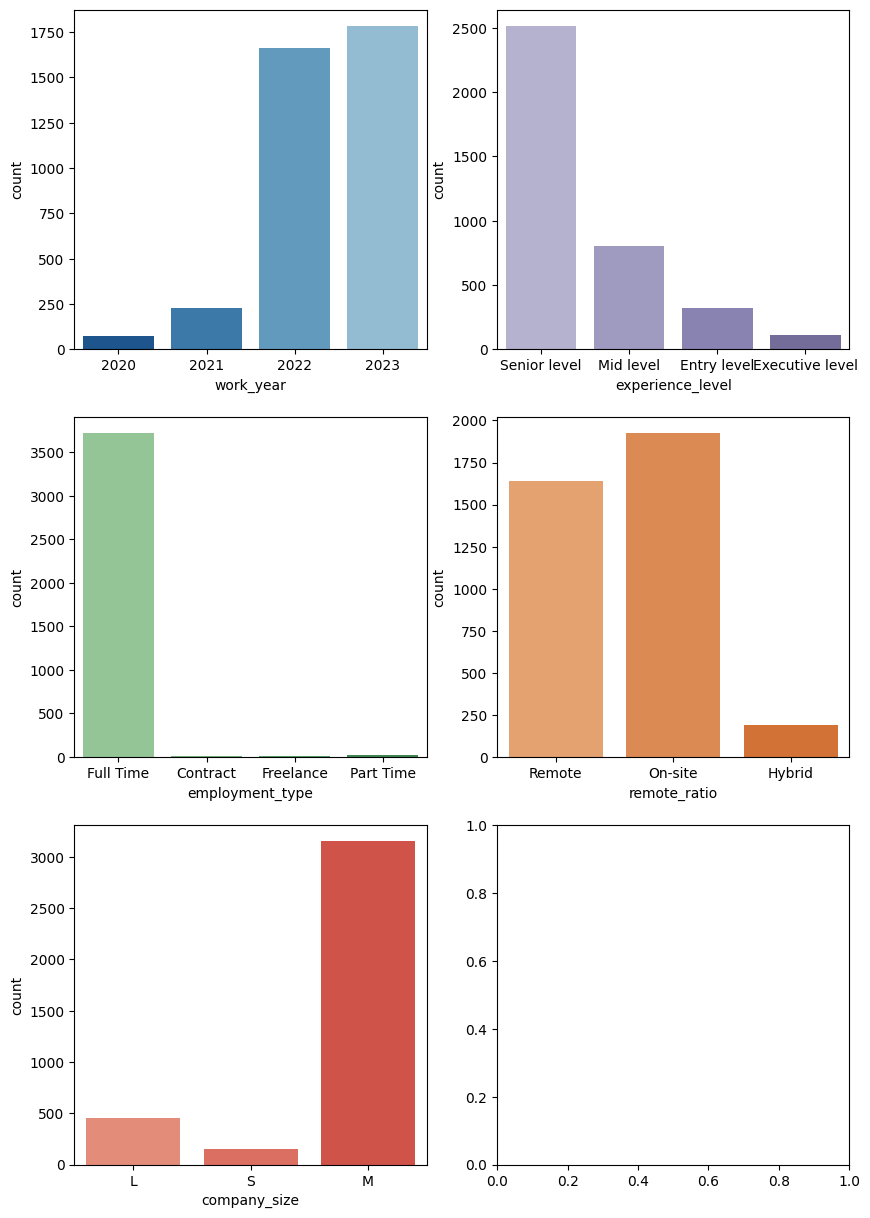

In [113]:
fig,axes = plt.subplots(3,2,figsize=(10,15))
ax1=sns.countplot(ax=axes[0,0],data=df, x="work_year",palette=sns.color_palette('Blues_r'))
ax2=sns.countplot(ax=axes[0,1],x="experience_level",data=df,palette=sns.color_palette('Purples_d'))
ax3=sns.countplot(ax=axes[1,0],data=df, x="employment_type",palette=sns.color_palette('Greens_d'))
ax4=sns.countplot(ax=axes[1,1],data=df, x="remote_ratio",palette=sns.color_palette('Oranges_d'))
ax5=sns.countplot(ax=axes[2,0],data=df, x="company_size",palette=sns.color_palette('Reds_d'))
plt.show()

**Insights from the above plots**

1.   We can observe that the no. of jobs in the field of data increases with as the year goes.
2.  Most of instances available are for the Mid level and Senior level roles
3. Most of the instances available are from the individuals having Full time jobs and others are relatively negligible.
4. Most of the instances available are from the individuals having No remote jobs and more than half of the individuals have Full time remote jobs.
5. Medium size employee candidates are more favoured



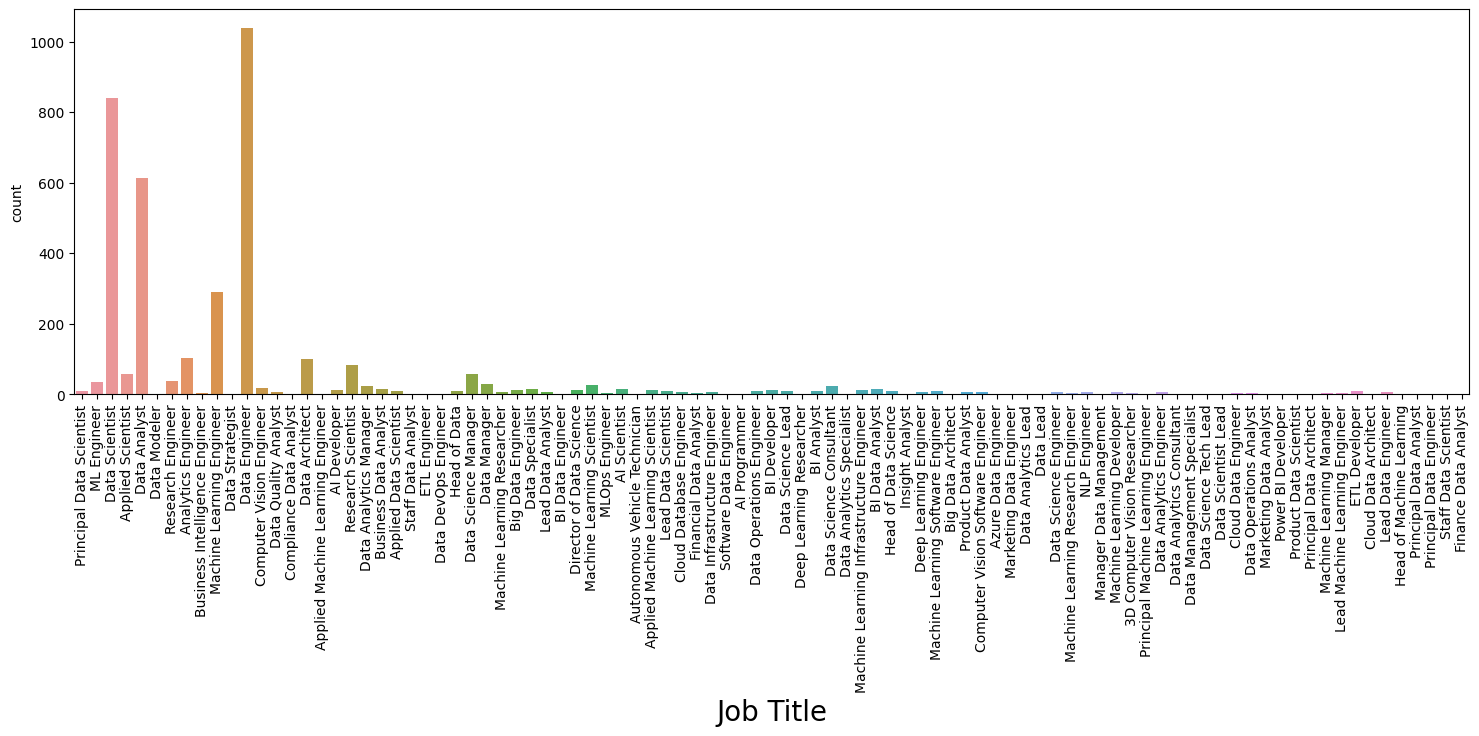

In [114]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['job_title'])
plt.xticks(rotation=90)
plt.xlabel('Job Title',fontsize=20)
plt.show()

Top most demanding job titles are **Data engineer, Data scientist, Data Analyst, Machine Learning engineer, Analytics Engineer**

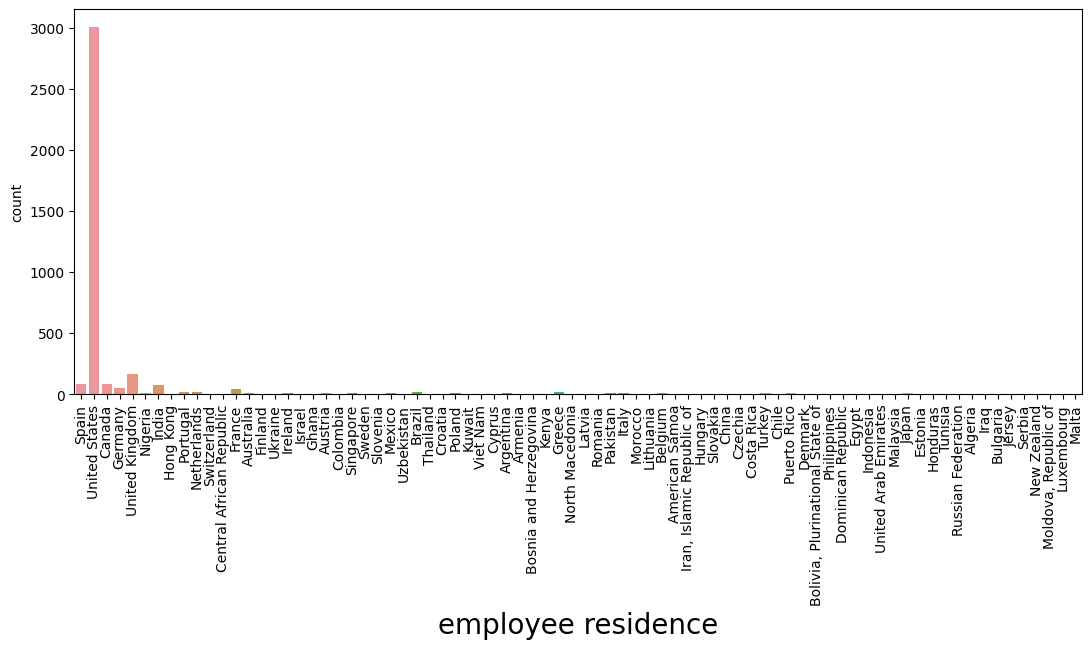

In [115]:
plt.figure(figsize=(13,5))
sns.countplot(data=df,x='employee_residence')
plt.xticks(rotation=90)
plt.xlabel('employee residence',fontsize=20)
plt.show()

Data instances are more biased towards Unites States indicating that most of employees live in United States. This might happen due to insufficient data

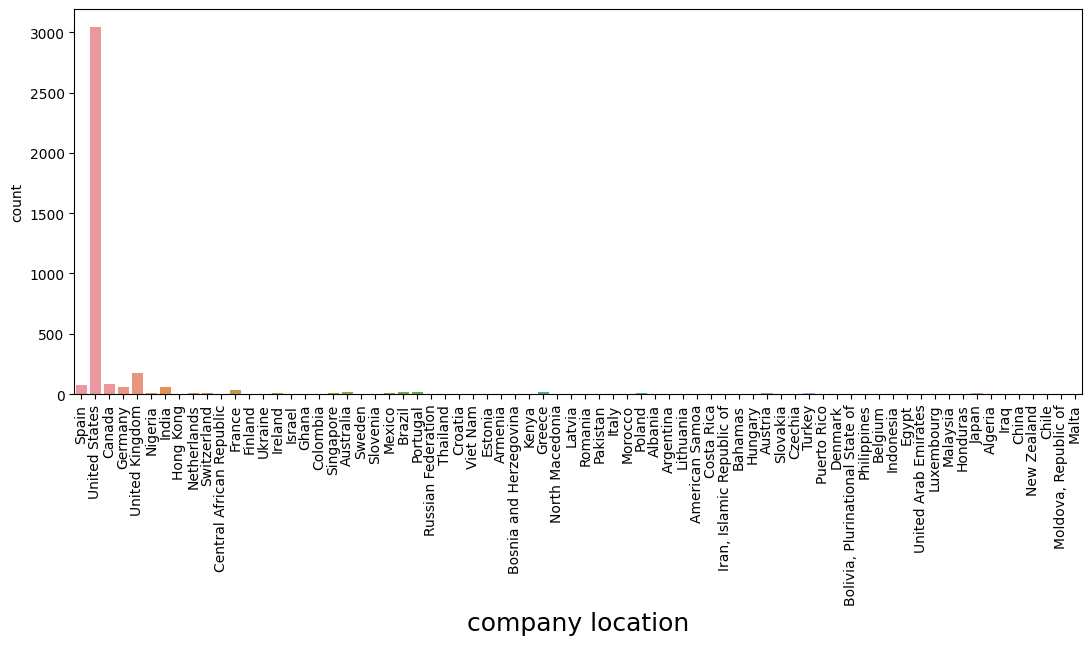

In [116]:
plt.figure(figsize=(13,5))
sns.countplot(x='company_location',data=df)
plt.xticks(rotation=90)
plt.xlabel('company location',fontsize=18)
plt.show()

Here the data instances are more biased towards United States indicating that most of the most of the companies are located in United states. This might be due to insufficient data.  

<Axes: xlabel='salary_in_usd', ylabel='Count'>

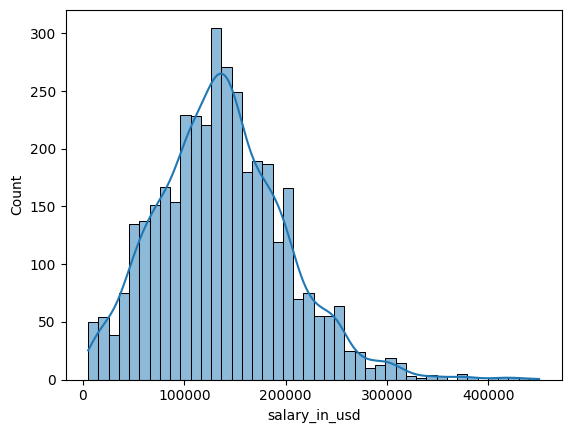

In [117]:
sns.histplot(data=df,x=df['salary_in_usd'],kde=True)

The salaries are ranging from 0 to $400k. Also we can observe some exceptional values. Since the above distribution is right-skewed , it's better to consider median salary for the future comparisions. 

Text(0.5, 0, 'Salary (in usd)')

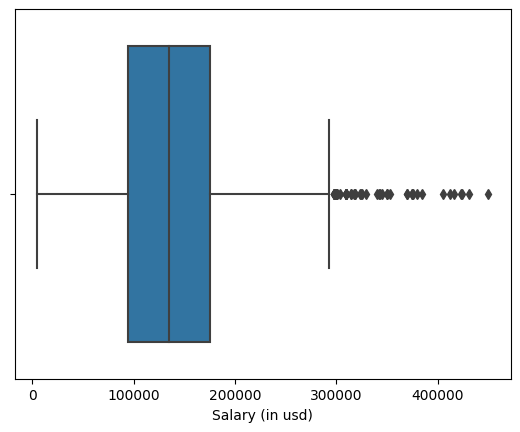

In [118]:
sns.boxplot(x=df['salary_in_usd'])
plt.xlabel('Salary (in usd)')

In [119]:
median_salary = df['salary_in_usd'].groupby(df['job_title']).median().nlargest(15).sort_values(ascending=False).reset_index()

## **Bi-Variate Analysis**

Text(0, 0.5, 'Salary (in USD)')

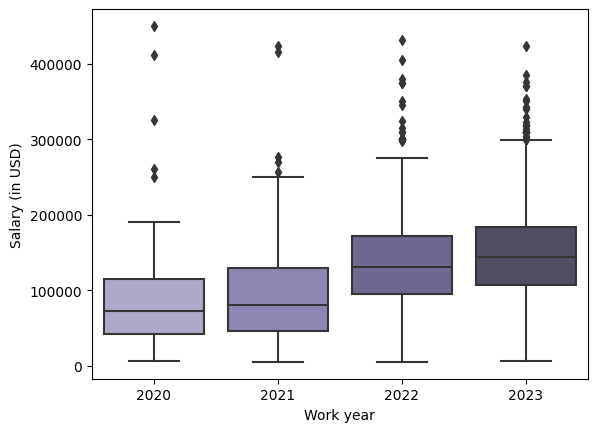

In [120]:
sns.boxplot(data=df, x=df['work_year'], y=df['salary_in_usd'],palette='Purples_d')
plt.xlabel('Work year')
plt.ylabel('Salary (in USD)')

Here we can observe that as the work year increases, the salary also increases, which means these two relations are highly correlated

Text(0, 0.5, 'Salary (in USD)')

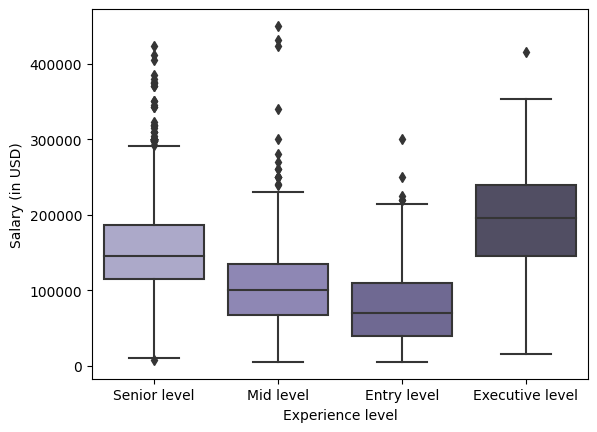

In [121]:
sns.boxplot(data=df, x=df['experience_level'], y=df['salary_in_usd'],palette='Purples_d')
plt.xlabel('Experience level')
plt.ylabel('Salary (in USD)')

1. The **highest Median salary** of a executive-level employee is around **200k dollars**.
2. Second highest median salary of a Senior-level employee is around **145k dollars**.
3. Median salary of Mid-level is around **100k dollars**.
4. Median salary of entry-level employee is around **90k dollars**.

Text(0, 0.5, 'Salary (in USD)')

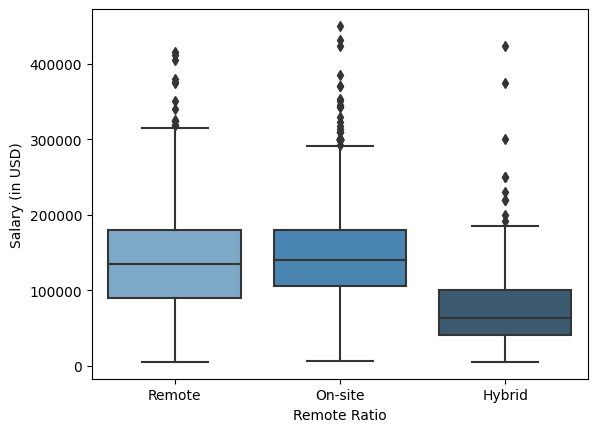

In [122]:
sns.boxplot(data=df, x=df['remote_ratio'], y=df['salary_in_usd'],palette='Blues_d')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary (in USD)')

Here we observe that the individuals having On-site jobs have the highest  median salary of around **140k dollars** . Also the median salary of individuals having Full Remote jobs is almost same as that of No remote jobs which is around **137k dollars**

Text(0, 0.5, 'Salary (in USD)')

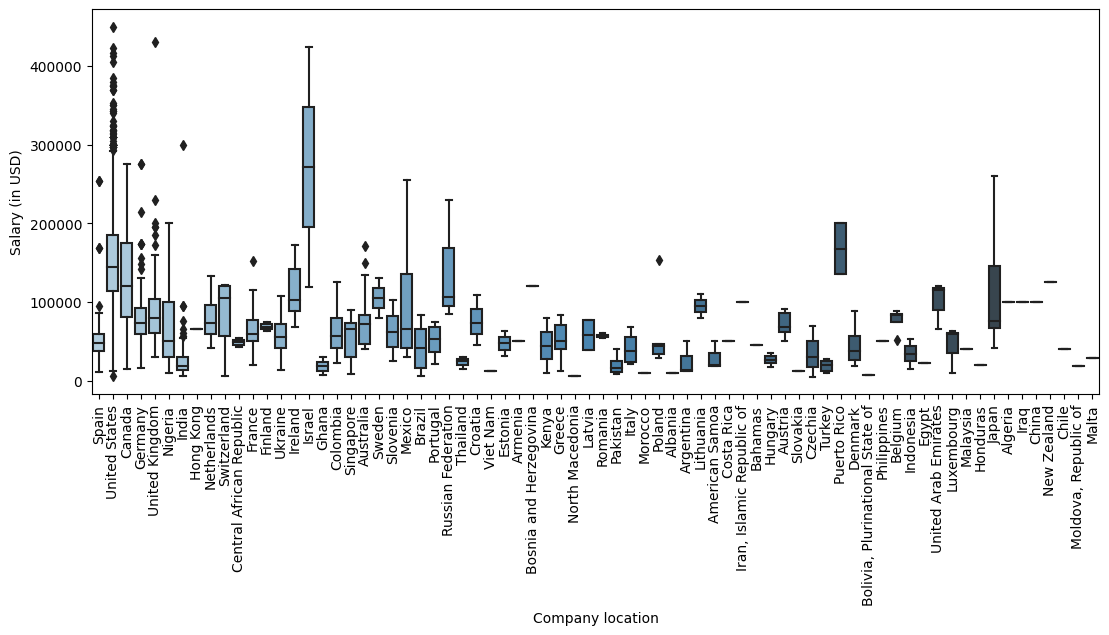

In [123]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df, x=df['company_location'], y=df['salary_in_usd'],palette='Blues_d')
plt.xticks(rotation=90)
plt.xlabel('Company location')
plt.ylabel('Salary (in USD)')

Here we can observe that the Companies in **Israel** ,**USA** and **Canada** offer the highest median salaries. Although **Israel** and **Canada** is just 1% of the whole data. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Data Science Tech Lead'),
  Text(1, 0, 'Cloud Data Architect'),
  Text(2, 0, 'Data Lead'),
  Text(3, 0, 'Data Analytics Lead'),
  Text(4, 0, 'Head of Data'),
  Text(5, 0, 'Principal Data Engineer'),
  Text(6, 0, 'Applied Scientist'),
  Text(7, 0, 'Principal Machine Learning Engineer'),
  Text(8, 0, 'Data Science Manager'),
  Text(9, 0, 'Data Infrastructure Engineer'),
  Text(10, 0, 'Machine Learning Software Engineer'),
  Text(11, 0, 'Computer Vision Engineer'),
  Text(12, 0, 'Machine Learning Infrastructure Engineer'),
  Text(13, 0, 'Business Intelligence Engineer'),
  Text(14, 0, 'Director of Data Science')])

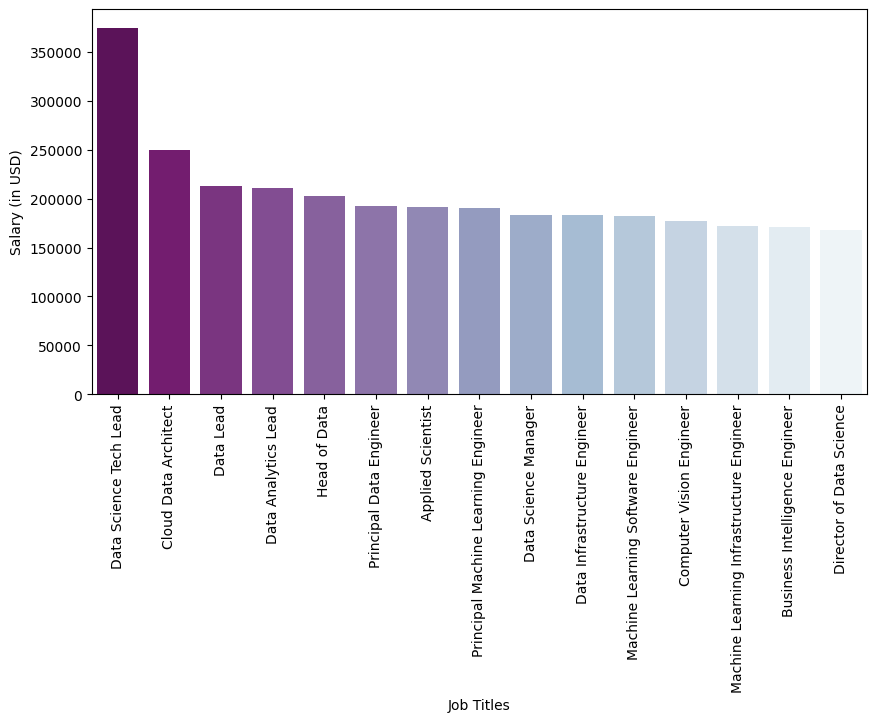

In [124]:
plt.figure(figsize=(10,5))
sns.barplot(data=df['salary_in_usd'].groupby(df['job_title']).median().nlargest(15).sort_values(ascending=False).reset_index(), x='job_title', y='salary_in_usd',palette='BuPu_r')
plt.xlabel('Job Titles')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=90)

From this graph, we can observe that the **executive level** jobs have the highest median salaries . 

Text(0, 0.5, 'Salary (in USD)')

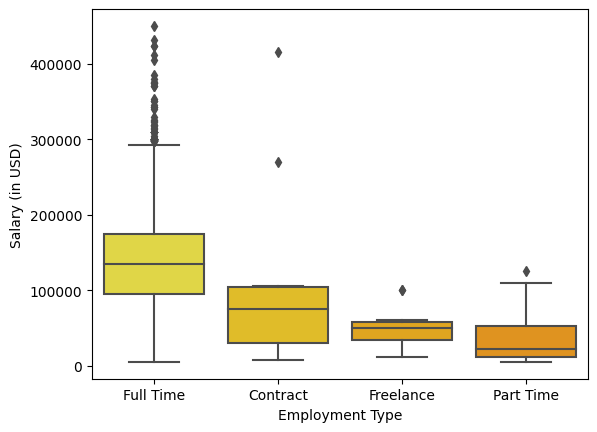

In [125]:
sns.boxplot(data=df, x=df['employment_type'], y=df['salary_in_usd'],palette='Wistia')
plt.xlabel('Employment Type')
plt.ylabel('Salary (in USD)')
# plt.xticks(rotation=90)

The median salary of full time employment is the highest with around 140k dollars. Again the data is highly based, so we cannot conclude which employment type is much better or worth it

## **Data Wrangling**

### **Label Encoding**

In [126]:
df['work_year']=df['work_year'].astype('category')
cat_cols = [col for col in df.columns if df[col].dtype=='O']
df['work_year']=df['work_year'].cat.codes
le=LabelEncoder()
for col in cat_cols:
  df[col]=le.fit_transform(df[col])
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,3,3,2,84,80000,7,85847,66,2,62,0
1,3,2,0,66,30000,19,30000,75,2,70,2
2,3,2,0,66,25500,19,25500,75,2,70,2
3,3,3,2,47,175000,19,175000,11,2,12,1
4,3,3,2,47,120000,19,120000,11,2,12,1


### **Handling outliers**

The interquartile range (IQR) tells you the range of the middle half of your dataset. You can use the IQR to create “fences” around your data and then define outliers as any values that fall outside those fences.


In [127]:
#Inter-quartile range
Q1 = np.percentile(df["salary_in_usd"], 25, interpolation = 'midpoint')
Q2 = np.percentile(df["salary_in_usd"], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df["salary_in_usd"], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers=[x for x in df['salary_in_usd'] if x<=lower_fence or x>=upper_fence]
outliers

<ipython-input-127-f21cc8d84682>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df["salary_in_usd"], 25, interpolation = 'midpoint')
<ipython-input-127-f21cc8d84682>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df["salary_in_usd"], 50, interpolation = 'midpoint')
<ipython-input-127-f21cc8d84682>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.2

[342810,
 309400,
 300000,
 342300,
 318300,
 309400,
 300000,
 329500,
 304000,
 353200,
 297300,
 317070,
 423834,
 376080,
 299500,
 297300,
 299500,
 340000,
 310000,
 310000,
 300240,
 300240,
 370000,
 323300,
 299500,
 310000,
 375000,
 318300,
 385000,
 370000,
 314100,
 350000,
 310000,
 300000,
 299500,
 300000,
 300000,
 297300,
 297300,
 310000,
 310000,
 430967,
 300000,
 310000,
 299500,
 300000,
 375000,
 350000,
 315000,
 300000,
 345600,
 300000,
 297500,
 300000,
 300000,
 324000,
 405000,
 380000,
 450000,
 416000,
 325000,
 423000,
 412000]

In [128]:
# ## As there are very less no.of outliers we can drop those values
df.drop(df[df['salary_in_usd']>=324000].index,inplace=True)

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['salary_in_usd'] = scaler.fit_transform(df[['salary_in_usd']])
X = df.drop(['salary','salary_in_usd','salary_currency'],axis=1)  #independent columns
y = df['salary_in_usd']   

In [130]:
X.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,3,3,2,84,66,2,62,0
1,3,2,0,66,75,2,70,2
2,3,2,0,66,75,2,70,2
3,3,3,2,47,11,2,12,1
4,3,3,2,47,11,2,12,1


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [132]:
print(model.intercept_)
print(model.coef_)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,predictions)))

-3.2352008297996866
[ 0.22928461  0.26169586  0.30688063  0.00791996  0.0128318   0.09474933
  0.00269904 -0.08892886]
MSE :  0.7909805982899211
RMSE :  0.8893709002940905
